<a href="https://colab.research.google.com/github/Vinuyesh/Employ_Churn_rate_ANN/blob/main/ANN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

# Part 1 - Data Preprocessing

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload your file

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [ ]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]   #features
y = dataset.iloc[:, 13]     #target

In [ ]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [ ]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1) #axis=1 (col) axis=0 (row)
#print(X)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Germany  Spain  ...   Male  Germany  \
0                  1        101348.88    False  False  ...  False    

In [ ]:
#check columns
print(X.columns)
# no of rows and columns
no_rc=X.shape[0:2]
print(no_rc)
#no_rows
no_rows=len(X)
print(no_rows)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male',
       'Germany', 'Spain', 'Male', 'Germany', 'Spain', 'Male', 'Germany',
       'Spain', 'Male', 'Germany', 'Spain', 'Male'],
      dtype='object')
(10000, 23)
10000


In [ ]:
## Drop Unnecessary columns
#X=X.drop(['Geography','Gender'],axis=1) #already dropped because of one-hot encoding
print(X)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Germany  Spain  ...   Male  Germany  \
0                  1        101348.88    False  False  ...  False    

# Splitting the dataset into the Training set and Test set

The value of random_state (e.g., 10) does not affect the quality of the model or the accuracy directly. It simply ensures reproducibility by providing a fixed pattern of splitting. Different random seeds produce different splits, but they all maintain the same proportion specified by test_size.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# my X_tain,X_test are independent variables. Means they have only the split of dataset
# And my y_train,y_test are dependent variables. and they contain target variables

# Feature Scaling

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Part 2 - Now let's make the ANN!


In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
#Sequential model: Allows you to build a neural network layer by layer.
#Dense layer: Fully connected neural network layer.
#Activation functions (LeakyReLU, PReLU, ELU): Introduce non-linearity into the network, helping it learn complex patterns.
#Dropout: Regularization technique to prevent overfitting by randomly ignoring neurons during training.
#This setup is typical when building deep neural networks, especially for classification or regression tasks.

In [ ]:
# Initialising the ANN Sequential model
##classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
#classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))
##classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=23))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Adding the second hidden layer
##classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
##classifier.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid'))

In [ ]:
# Compiling the ANN
##classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
#The optimizer: This determines how the model will update its weights.
#The loss function: This helps measure the error between the predicted outputs and actual outputs.
#The metrics: These are used to evaluate the model's performance during training and testing.

What Happens During Training:
Forward Propagation: The model computes predictions based on the current weights and the input data.
Backpropagation: The error (calculated using the loss function) is propagated back through the network, and weights are updated to reduce this error.
Batch Size: Instead of using the entire dataset at once, smaller batches of 10 samples are processed at a time to make training more efficient.
Validation: After every epoch, the model’s performance is evaluated on the validation data to ensure it’s not overfitting.

In [ ]:
# Fitting the ANN to the Training set
#model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)
##model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100 )

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_2" is incompatible with the layer: expected axis -1 of input shape to have value 11, but received input with shape (None, 23)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 23), dtype=float32)
  • training=True
  • mask=None

In [ ]:
print(X_train.shape)

(8000, 23)


In [ ]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer (input_dim=23 because X_train has 23 features)
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=23))

# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

# Adding the output layer (for binary classification)
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7874 - loss: 0.6138 - val_accuracy: 0.7936 - val_loss: 0.5458
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7958 - loss: 0.5281 - val_accuracy: 0.7959 - val_loss: 0.5077
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7961 - loss: 0.4914 - val_accuracy: 0.7955 - val_loss: 0.4895
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7871 - loss: 0.4857 - val_accuracy: 0.7955 - val_loss: 0.4771
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7916 - loss: 0.4699 - val_accuracy: 0.7967 - val_loss: 0.4683
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7926 - loss: 0.4698 - val_accuracy: 0.7986 - val_loss: 0.4617
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7945 - loss: 0.4567 - val_accuracy: 0.7982 - val_loss: 0.4566
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8001 - loss: 0.4401 - val_accuracy: 0.8008

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


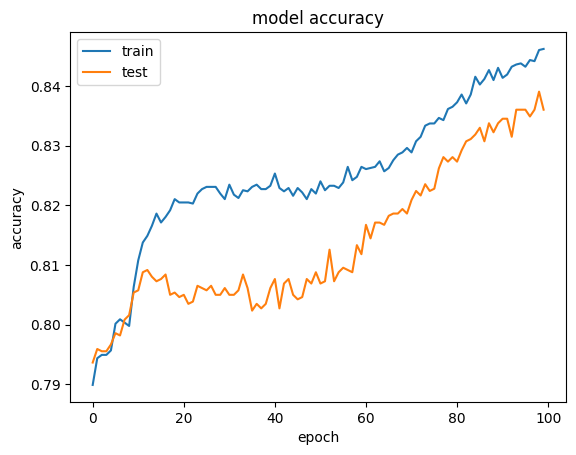

In [ ]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

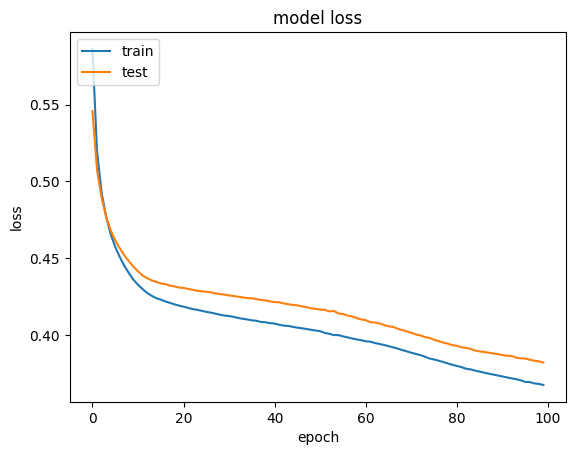

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1542   53]
 [ 248  157]]


In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print(score)

0.8495
